In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 24})
#from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack, hstack

import MagellanicStream as ms

import warnings
warnings.filterwarnings('ignore')

import galpy as gp
from galpy.potential import MWPotential2014, plotPotentials, plotDensities, plotRotcurve, MiyamotoNagaiPotential
from galpy.orbit import Orbit

In [2]:
heir = fits.getdata('/Users/joshpovick/Desktop/Research/fits/MS_youngfits/heir.fits',1)

In [3]:
o= Orbit(vxvv=[1.,0.1,1.1,0.,0.1],ro=8.,vo=220.)
ts= np.linspace(0,100,1000)
o.integrate(ts,MWPotential2014,method='odeint')

list

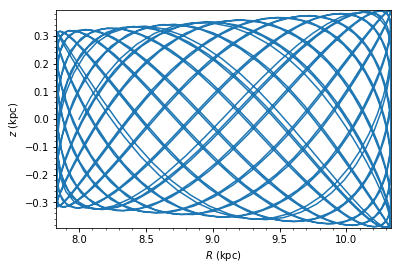

In [4]:
figs  = o.plot()

type(figs)

In [5]:
#Convert to cylindrical coordinates
from astropy.coordinates import Distance

def cart2cyl(x, y, z):
    r = np.sqrt(np.square(x)+np.square(y))
    phi = np.arctan(np.divide(y,x))
    return r,phi,z

galact = []
for i in range(len(heir)):
    cr = coord.ICRS(ra=heir['RA'][i]*u.degree, dec=heir['DEC'][i]*u.degree, \
                        distance=Distance(parallax=heir['parallax'][i]*u.mas,allow_negative=True),\
                        pm_ra_cosdec=heir['pmra'][i]*u.mas/u.yr,\
                        pm_dec=heir['pmdec'][i]*u.mas/u.yr,
                        radial_velocity=heir['VLSR'][i]*u.km/u.s)
    gcoor = cr.transform_to(coord.Galactocentric)
    galact.append(gcoor)

galx = [] 
galy = []
galz = []
velx = []
vely = []
velz = []
for i in range(len(galact)):
    galx.append(galact[i].x.value*(1/1000.))
    galy.append(galact[i].y.value*(1/1000.))
    galz.append(galact[i].z.value*(1/1000.))
    velx.append(galact[i].v_x.value)
    vely.append(galact[i].v_x.value)
    velz.append(galact[i].v_x.value)
    
galr,galphi,galz = cart2cyl(galx,galy,galz)
velr,velphi,velz = cart2cyl(velx,vely,velz)

In [13]:
#each plot in the next cell has two plots associated with it and the names are in the same order as
#this cell. I am truing to figure out th labelling
#Duplicates have not been removed!!!
print(heir['NAME'])

['DI1374' 'DI1452' 'DI1453' 'DI1454' 'DI1464' 'DI1466' 'DI1478' 'DI1480'
 'DI1482' 'DI1486' 'DI1496' 'DI1498' 'DI1499' 'DI1511' 'DI1515' 'DI1518'
 'DI1522' 'DI1526' 'DI1527' 'DI1530' 'DI1542' 'DI1567' 'DI1569' 'DI1592'
 'DI1631' 'DI1418' 'DI1441' 'DI1442' 'DI1446' 'DI1452' 'DI1459' 'DI1480'
 'DI1518' 'DI1530' 'DI1536' 'DI1540' 'DI1544' 'DI1547' 'DI1554' 'DI1555'
 'DI1556' 'DI1562' 'DI1563' 'DI1565' 'DI1570' 'DI1575' 'DI1578' 'DI1651'
 'DI1354' 'DI1614' 'DI1678']


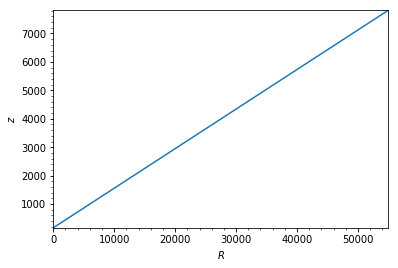

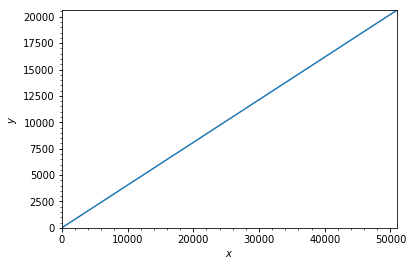

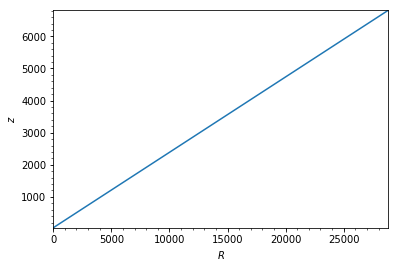

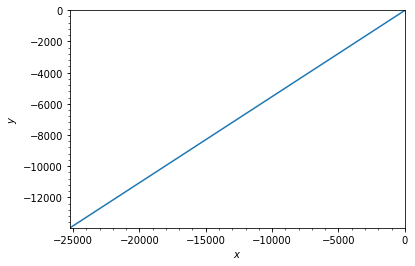

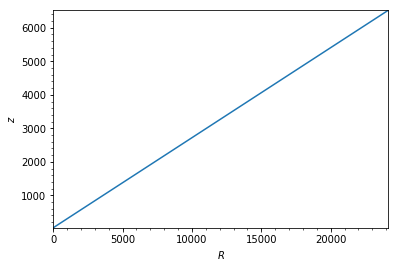

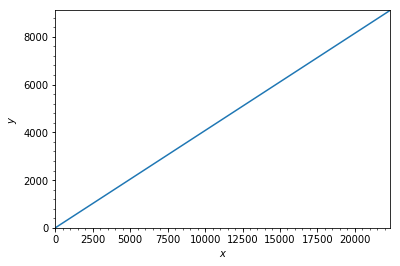

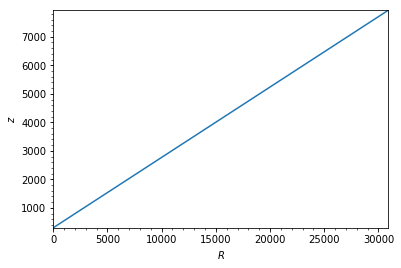

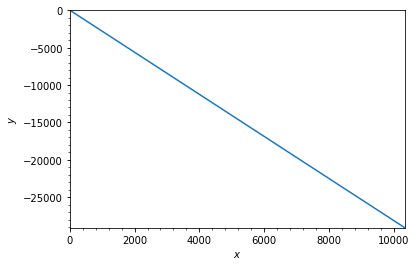

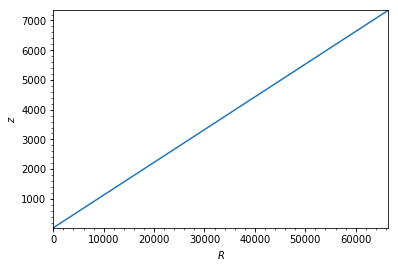

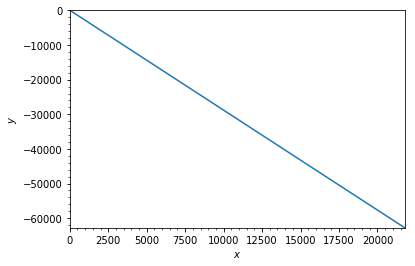

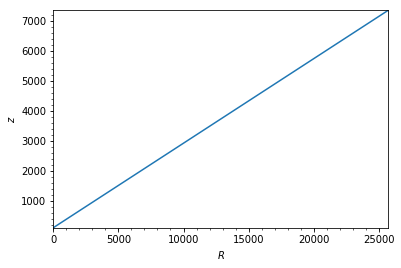

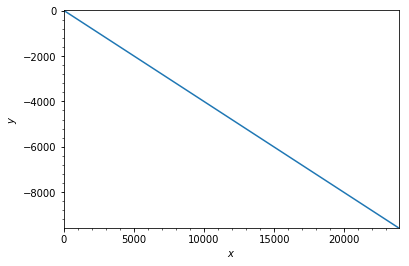

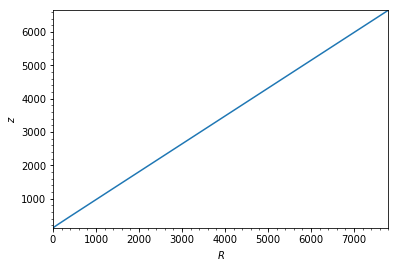

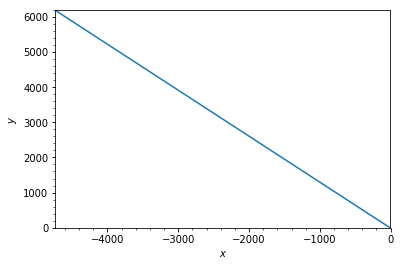

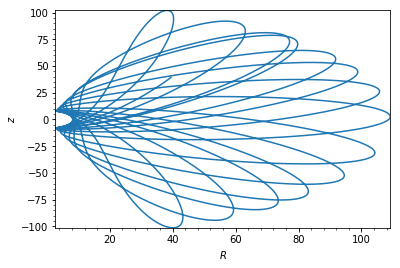

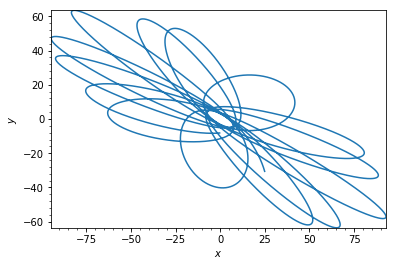

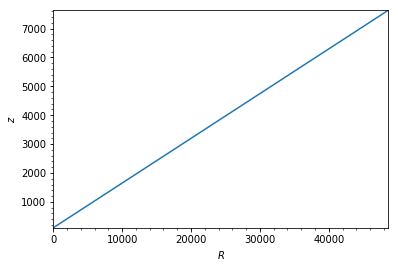

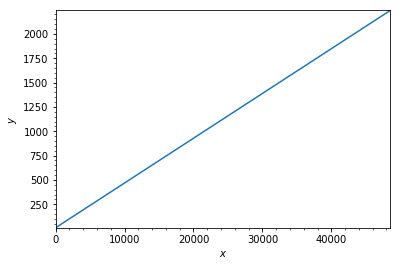

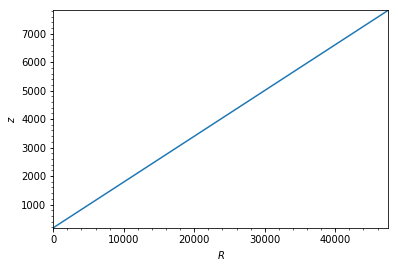

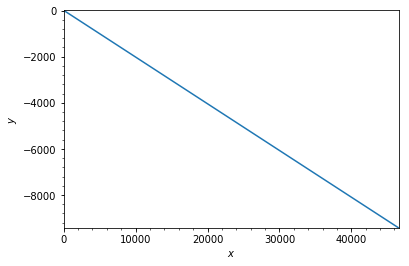

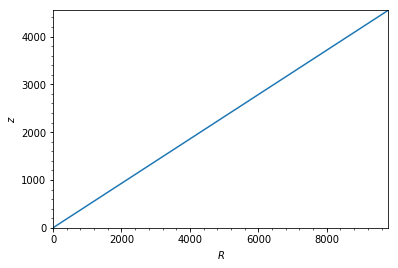

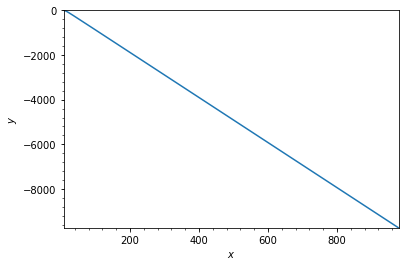

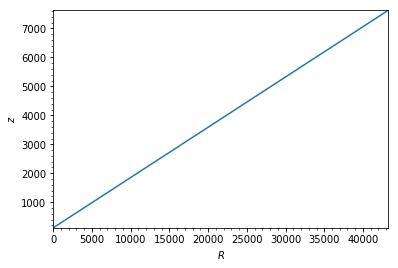

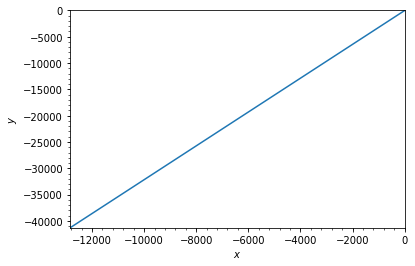

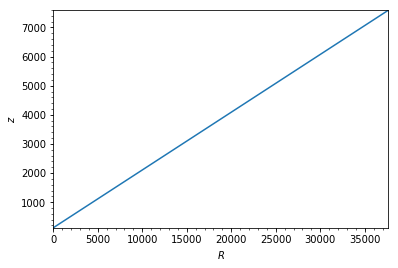

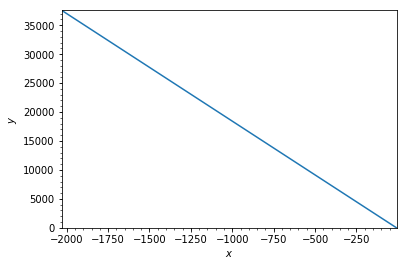

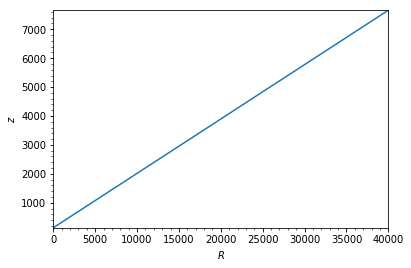

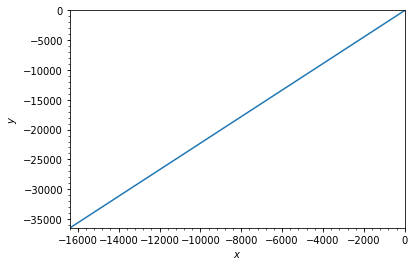

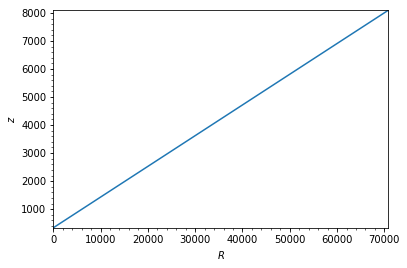

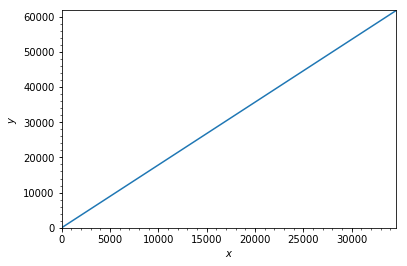

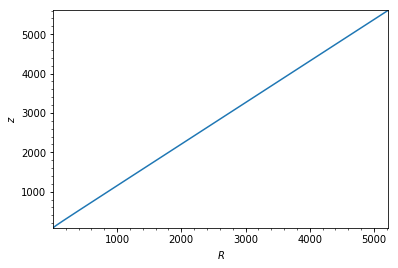

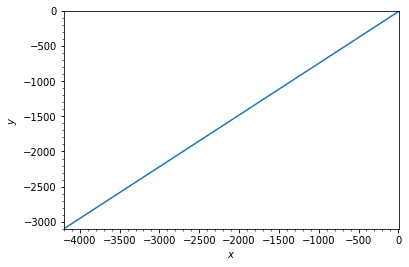

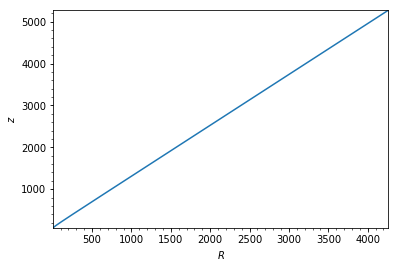

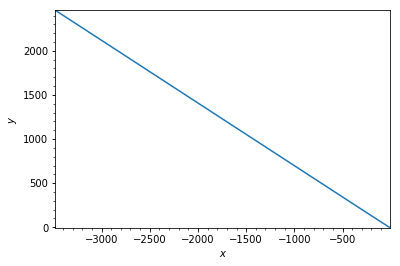

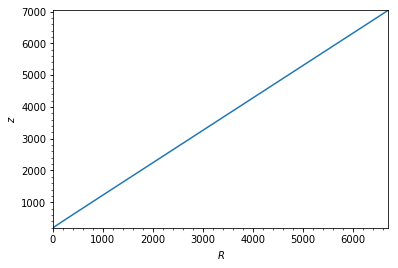

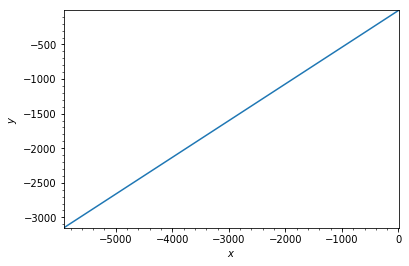

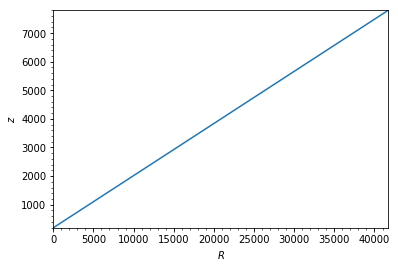

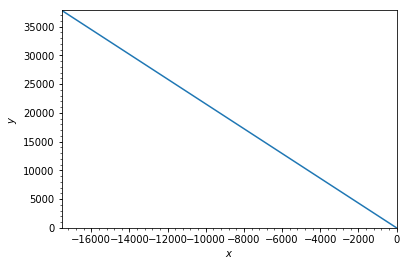

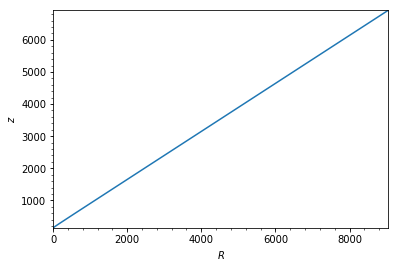

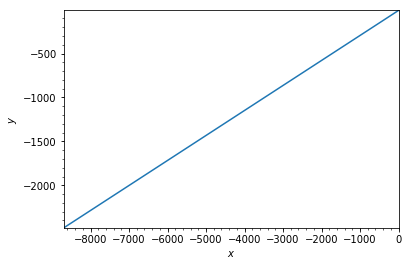

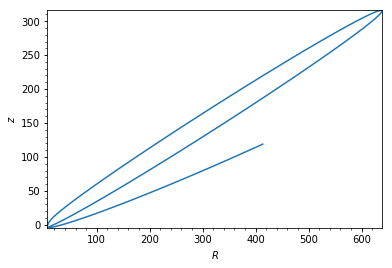

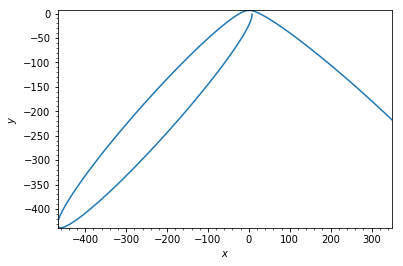

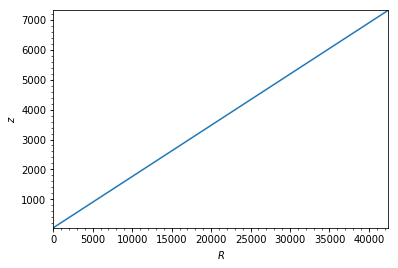

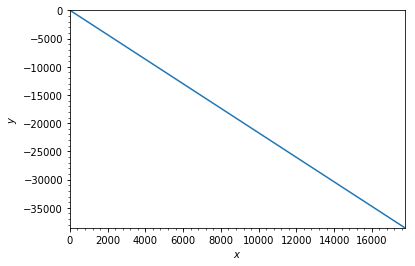

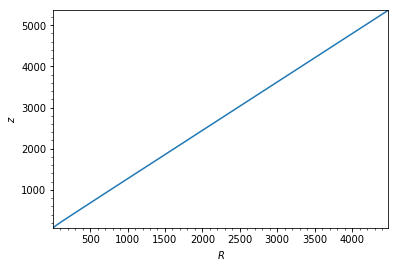

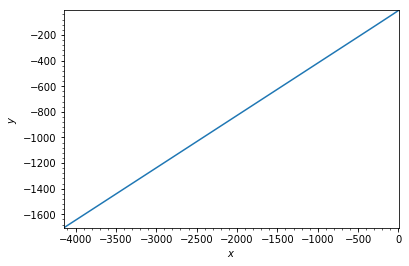

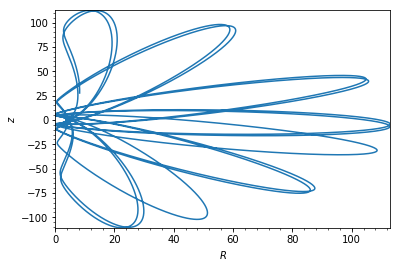

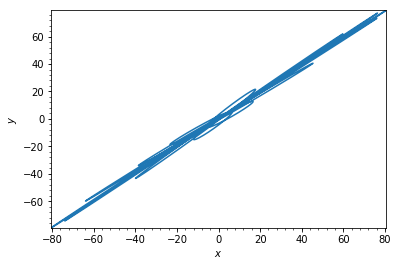

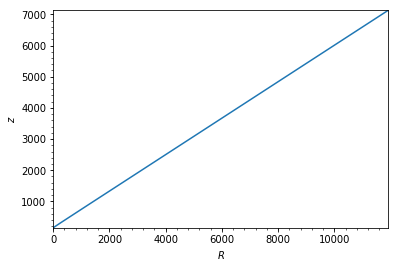

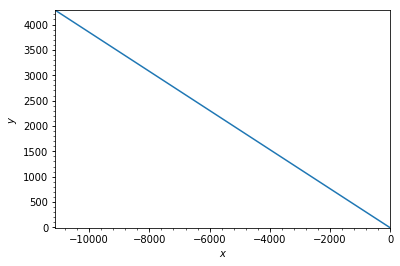

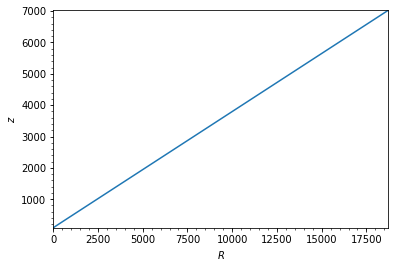

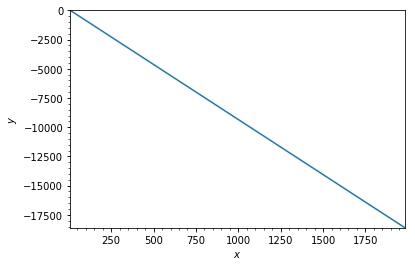

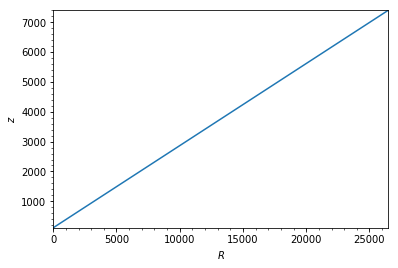

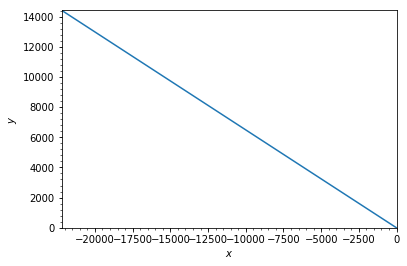

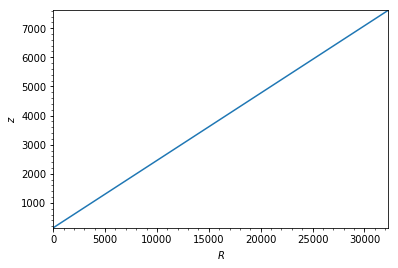

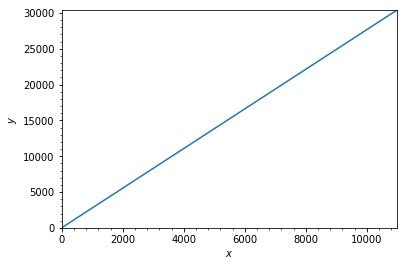

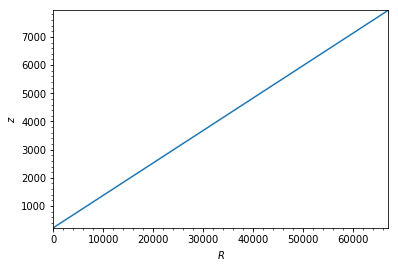

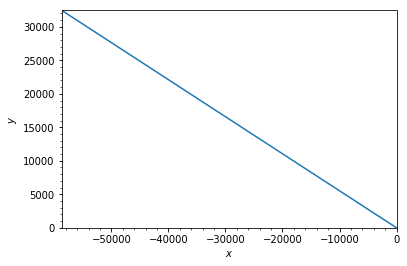

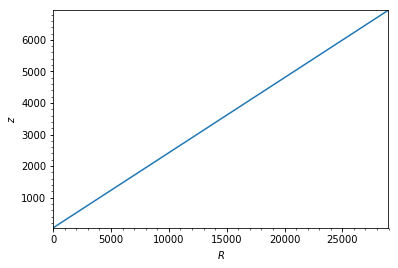

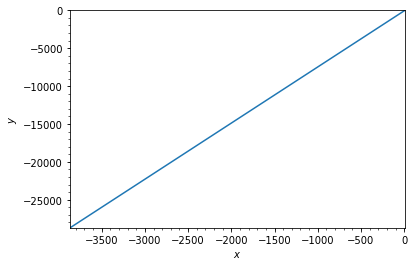

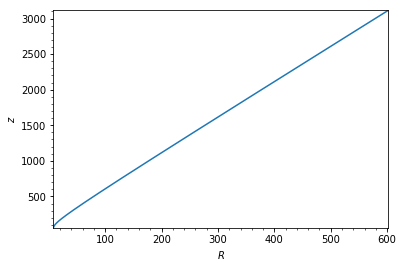

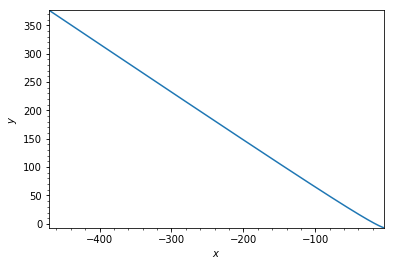

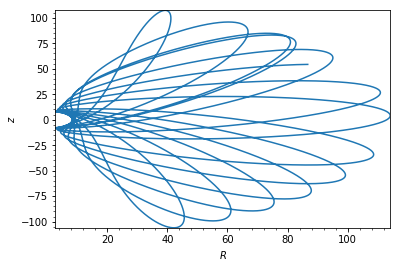

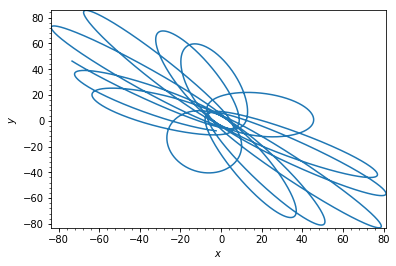

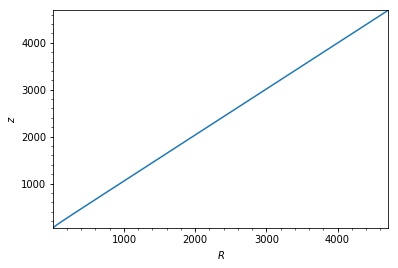

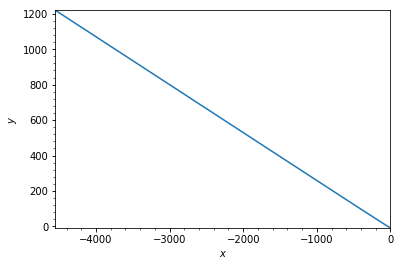

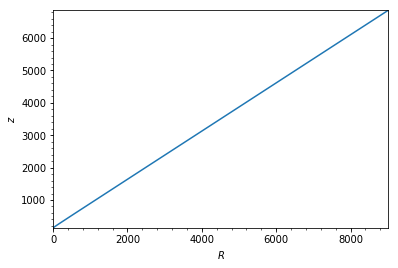

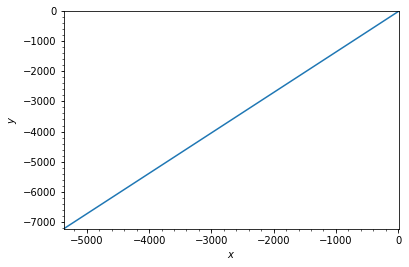

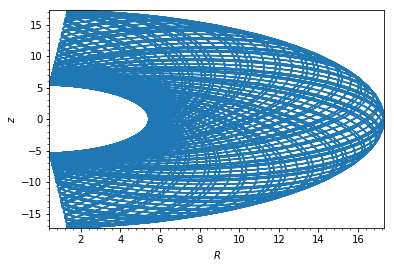

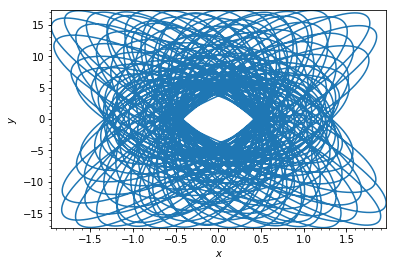

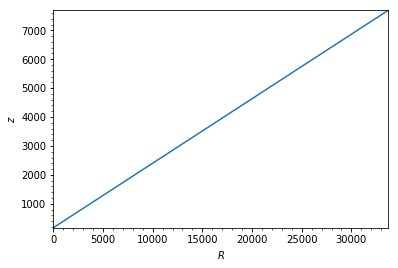

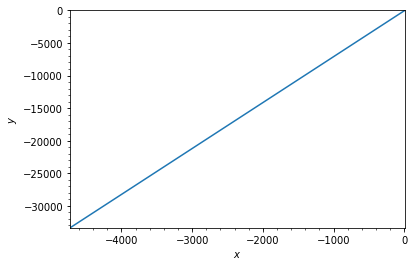

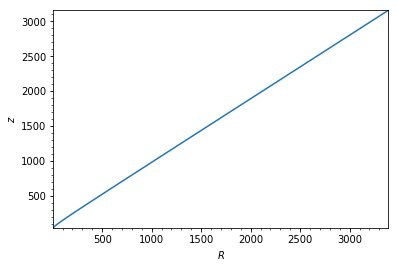

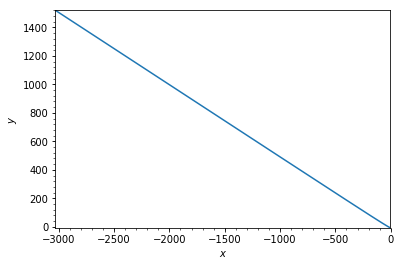

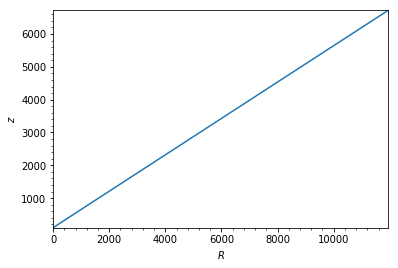

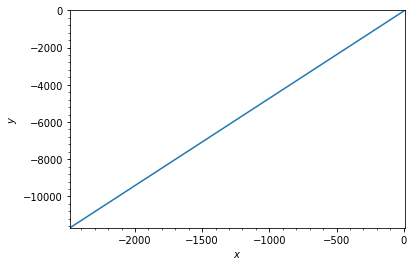

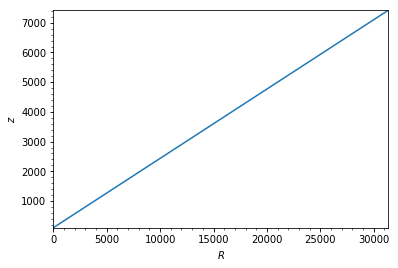

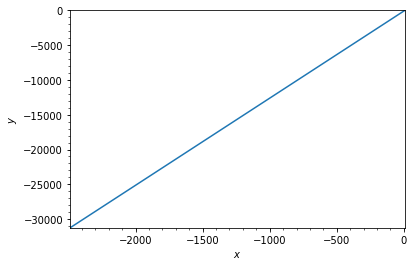

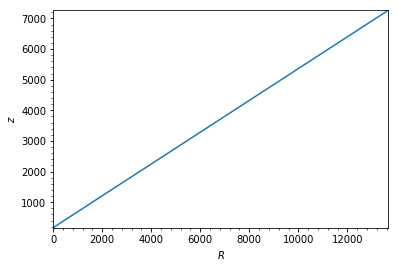

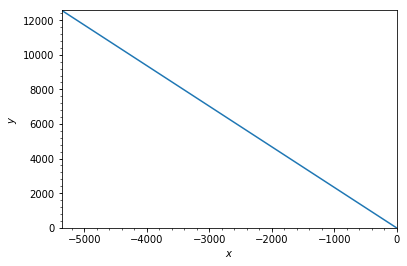

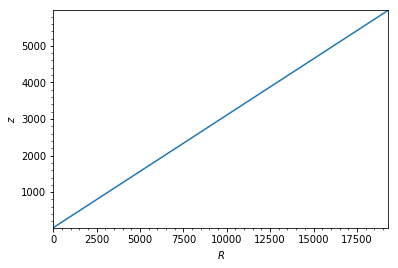

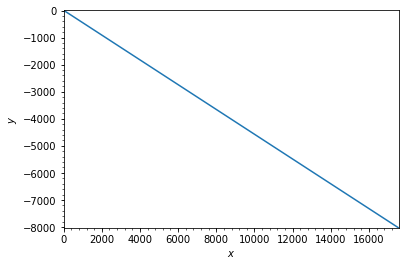

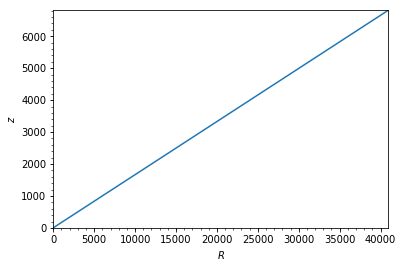

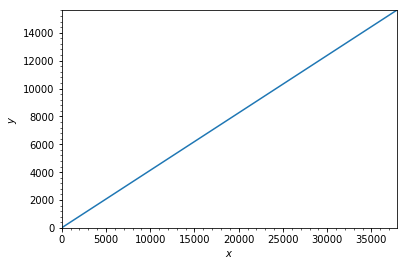

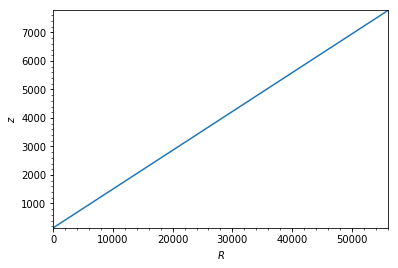

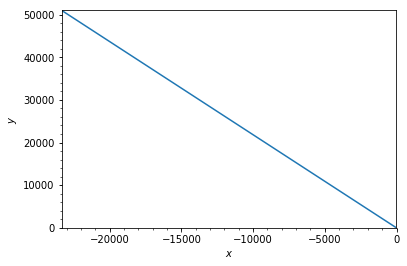

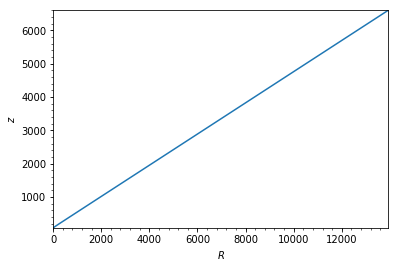

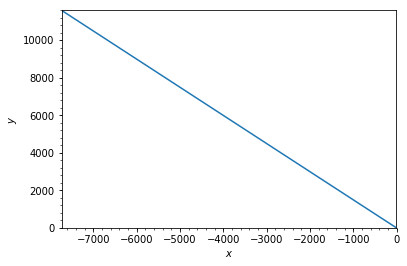

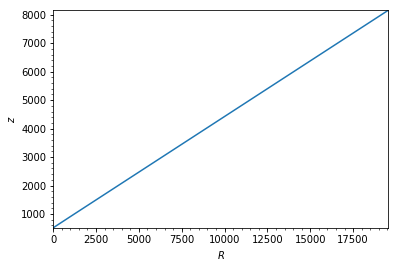

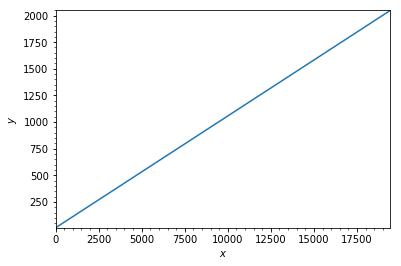

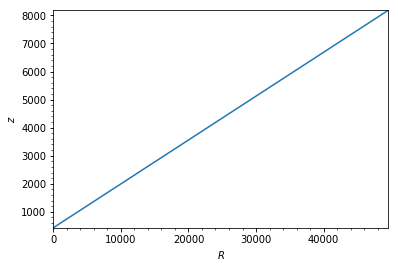

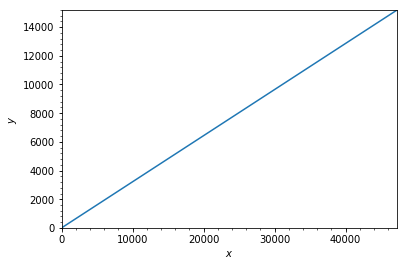

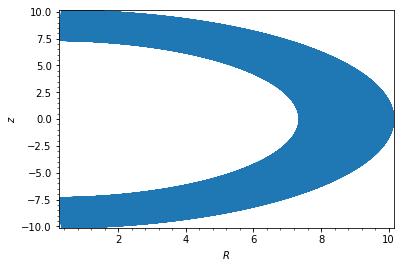

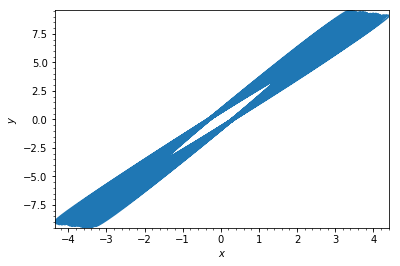

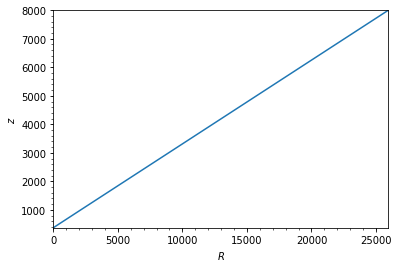

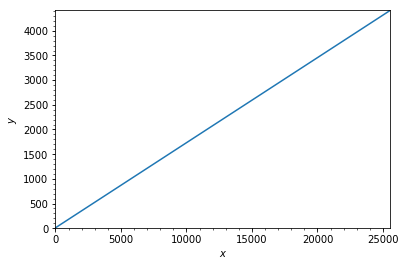

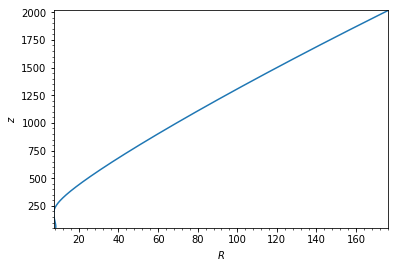

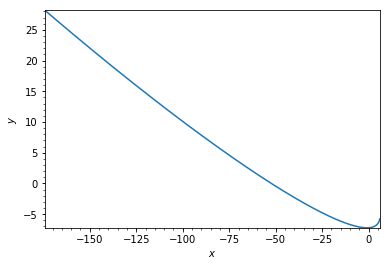

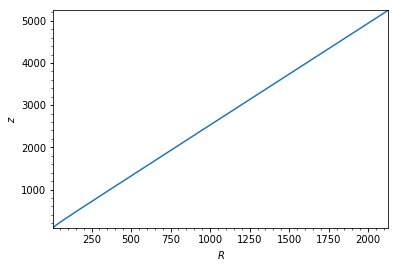

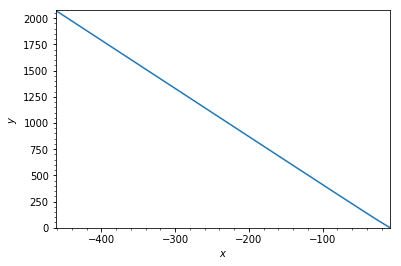

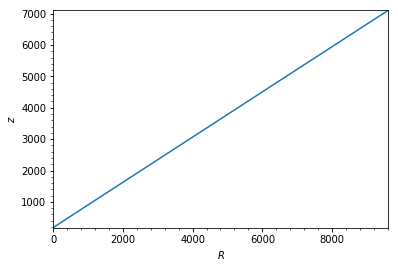

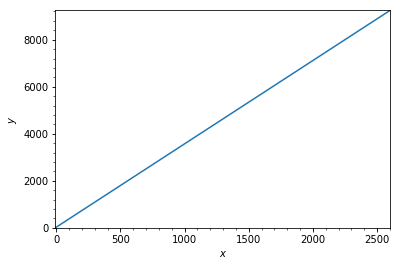

In [10]:
orb = []
for i in range(len(galact)):
    orb.append(Orbit([galr[i],galphi[i],galz[i],velr[i],velphi[i],velz[i]]))
    
ts = np.linspace(0,10000,100000)    
for j in range(len(orb)):
    orb[j].integrate(ts,MWPotential2014,method='odeint')
    orb[j].plot(use_physical=True)
    orb[j].plot(d1='x',d2='y',use_physical=True)

AttributeError: 'NoneType' object has no attribute 'x'

In [ ]:
np.sqrt(11.1**2+232.24**2+7.25**2)

In [ ]:
o.plotx()